In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [11]:
def drow_graph(func):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x_grid, y_grid = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_grid, y_grid, func.f(x_grid, y_grid), alpha=0.25)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [12]:
class EckleyFunction:
    def __init__(self, start = [5, 5]):
        self.start = start
        self.result = [0, 0, 0]
        self.glob_min = [0, 0, 0]
        self.gradient = []
        
    def f(self, x, y):
        return (- 20 * np.exp(- 0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))) -
                np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20)

    def dx(self, x, y):
        return (2.8284 * x * np.exp(-0.1414 * np.sqrt(x ** 2 + y ** 2))) / (np.sqrt(x ** 2 + y ** 2)) + np.pi * np.exp(
            0.5 * np.cos(2 * np.pi * x) + 0.5 * np.cos(2 * np.pi * y)) * np.sin(2 * np.pi * x)

    def dy(self, x, y):
        return (2.8284 * y * np.exp(-0.1414 * np.sqrt(x ** 2 + y ** 2))) / (
            np.sqrt(x ** 2 + y ** 2)) + np.pi * np.exp(
            0.5 * np.cos(2 * np.pi * x) + 0.5 * np.cos(2 * np.pi * y)) * np.sin(2 * np.pi * y)


class BoothFunction:
    def __init__(self, start = [5, 5]):
        self.start = start
        self.result = [0, 0, 0]
        self.glob_min = [1, 3, 0]
        self.gradient = []

    def f(self, x, y):
        return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

    def dx(self, x, y):
        return 10 * x + 8 * y - 34

    def dy(self, x, y):
        return 8 * x + 10 * y - 38
    


In [13]:
class DrowFunction():
    def __init__(self) -> None:
        self.x = np.linspace(-5, 5, 100)
        self.y = np.linspace(-5, 5, 100)
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, projection='3d')
        
    def create_graph(self, func):
        x_grid, y_grid = np.meshgrid(self.x, self.y)
        self.ax.plot_surface(x_grid, y_grid, func.f(x_grid, y_grid), alpha=0.25)
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Y')
        self.ax.set_zlabel('Z')
        plt.show()

class drow_classical_gd(DrowFunction):
    def drow_classical_gd(self, fun):
        self.ax.plot(fun.gradient[ : , 0], fun.gradient[ : , 1], fun.gradient[ : , 2], c='black')


[5, 5]


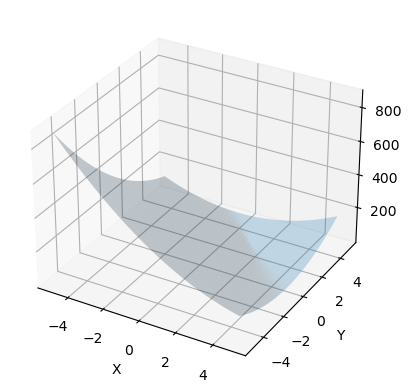

In [14]:
b = BoothFunction()
print(b.start)
d1 = DrowFunction()
d1.create_graph(b)


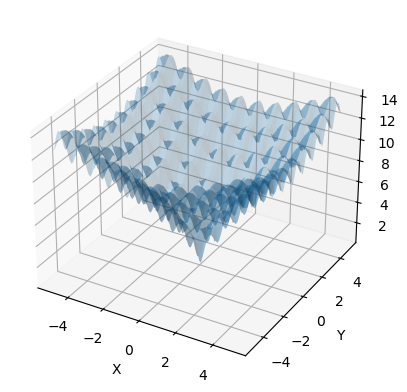

[5, 5]


In [15]:
e = EckleyFunction()
d2 = DrowFunction()
d2.create_graph(e)
print(e.start)

In [16]:
def classical_gd(fun, a = 0.1, crit=0.001):
    x_start = fun.start[0]
    y_start = fun.start[1]
    fun.gradient.append(np.array([x_start, y_start, fun.f(x_start, y_start)]))
    while np.abs(fun.dx(x_start, y_start))+np.abs(fun.dy(x_start,y_start)) > crit:
        x_new = x_start - a * fun.dx(x_start, y_start)
        y_new = y_start - a * fun.dy(x_start, y_start)
        x_start = x_new
        y_start = y_new
        fun.gradient.append(np.array([x_start, y_start, fun.f(x_start, y_start)]))
    
    result = fun.result = fun.gradient[-1]
    
    return result
    
        
        
        
    

In [17]:
result = classical_gd(b)
print(result)

[1.00003654e+00 3.00001827e+00 1.36836669e-08]


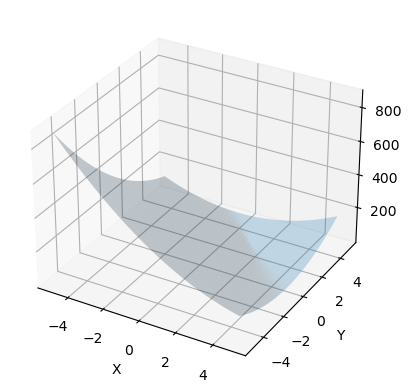

TypeError: list indices must be integers or slices, not tuple

In [19]:
n = drow_classical_gd()
n.create_graph(b)
n.drow_classical_gd(b)